# دلع ابراهيم & عمران ابراهيم & محمد ضياء الطرح & ماريا

# مشروع Data Mining & Machine Learning (mobile prices)

### Lib Import

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
# from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score

# Data Mining Part

## Loading Data

In [2]:
# !gdown --id 14yGBR4EuNDjxagaVdVpxUj5nb0Qnb4kC -O mobile_ukraine.zip

# zip_file_path = 'mobile_ukraine.zip'
# extracted_file_path = 'extracted_file'
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_file_path)

# # List the files in the extracted directory
# extracted_file = os.listdir(extracted_file_path)
# print(extracted_file)

In [3]:
df = pd.read_csv('phones_data.csv')

## Data Understanding & Visualization

In [4]:
df.head(10)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018
6,6,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.0,3400.0,12-2018
7,7,Honor,10 Lite 4/64GB Black,Android,134,4973.0,4733.0,5295.0,6,6.21,64.0,3400.0,1-2019
8,8,Honor,10 lite 3/128GB Blue,Android,477,5100.0,4990.0,5222.0,3,6.21,128.0,3400.0,1-2021
9,9,Honor,10 lite 3/64GB Black,Android,215,4948.0,4646.0,5372.0,8,6.21,64.0,3400.0,12-2018


In [5]:
df_len=len(df)
print('Data Length',df_len)

Data Length 1224


In [6]:
df.dtypes

Unnamed: 0          int64
brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [7]:
info_df = pd.DataFrame()
info_df['missing_values'] = df.isnull().sum()
info_df['missing_values_percentage'] = (info_df['missing_values'] / df.shape[0] * 100).round().astype(int)
info_df

,missing_values,missing_values_percentage
Unnamed: 0,0,0
brand_name,0,0
model_name,0,0
os,197,16
popularity,0,0
best_price,0,0
lowest_price,260,21
highest_price,260,21
sellers_amount,0,0
screen_size,2,0


In [8]:
df.nunique()

Unnamed: 0        1224
brand_name          64
model_name        1068
os                   6
popularity        1224
best_price         970
lowest_price       666
highest_price      648
sellers_amount      94
screen_size         82
memory_size         15
battery_size       151
release_date        73
dtype: int64

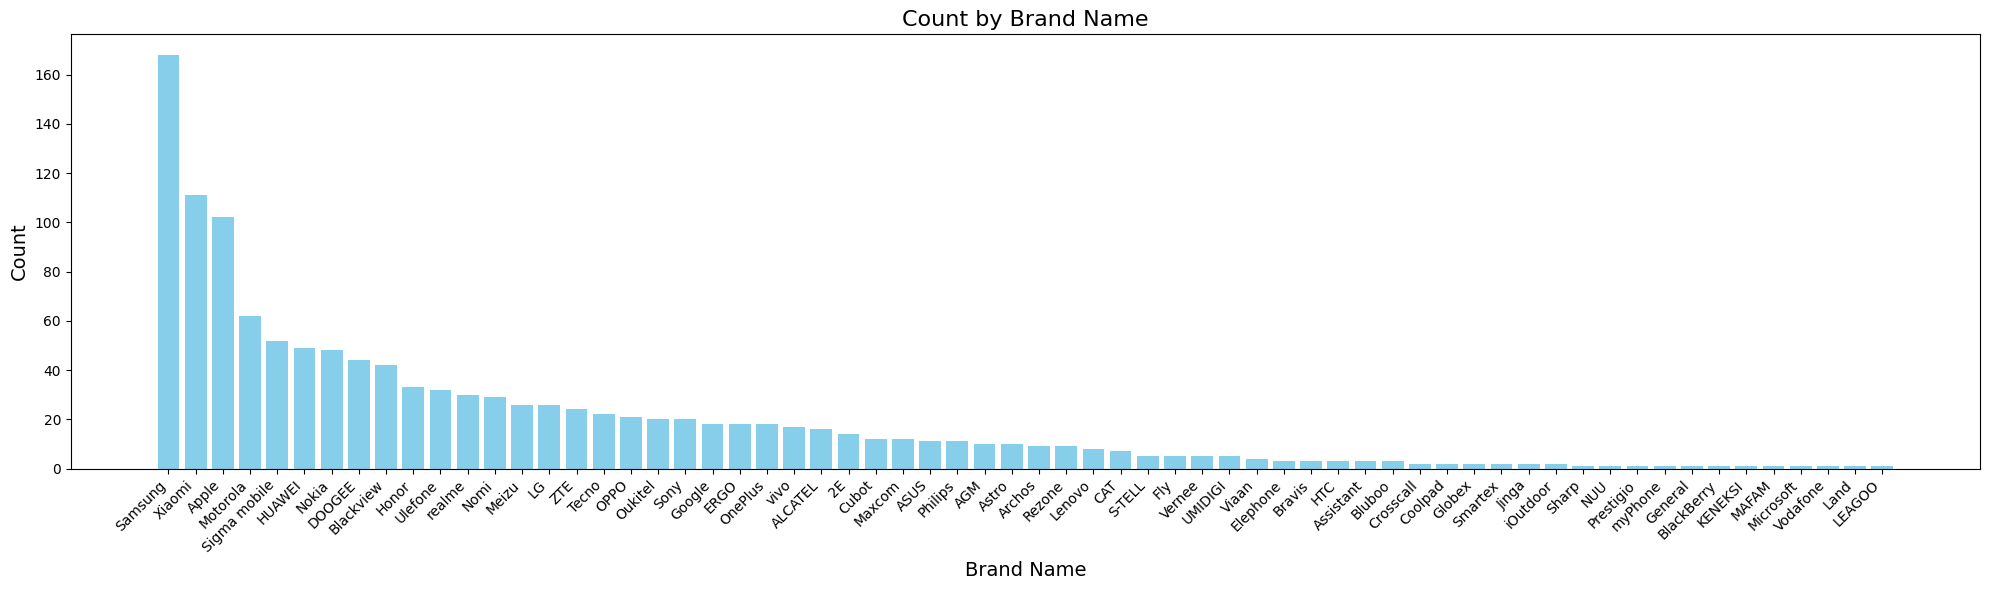

In [9]:
# Calculate value counts
brand_counts = df['brand_name'].value_counts()

# Create the figure and axis explicitly
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bar chart with custom color
ax.bar(brand_counts.index, brand_counts.values, color='skyblue')

# Set title and labels
ax.set_title('Count by Brand Name', fontsize=16)
ax.set_xlabel('Brand Name', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

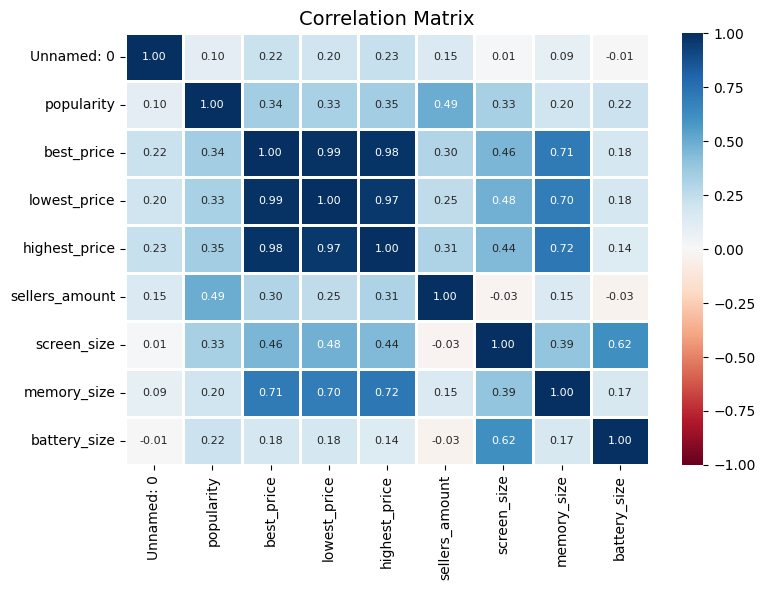

In [10]:
# Get numeric columns
num_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlations = num_df.corr()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot heatmap with minor tweaks: different color, border style, larger font
sns.heatmap(
    correlations,
    annot=True,
    fmt=".2f",
    cmap='RdBu',              # similar to 'coolwarm'
    vmin=-1, vmax=1,
    linecolor='white',        # white borders
    linewidth=1,
    annot_kws={"size": 8},    # slightly bigger text
    ax=ax
)

ax.set_title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

## Filling empty & fix corrupted data

### filling empty screen size

In [11]:
# Set default screen sizes for missing values
default_screen_sizes = np.where(
    df['brand_name'] == 'Sigma mobile',
    2.4,
    8
)

# Fill missing screen sizes based on brand condition
df['screen_size'] = df['screen_size'].fillna(pd.Series(default_screen_sizes, index=df.index))

### filling empty battery size

In [12]:
# Mapping of full model name to battery size
battery_map = {
    'AGM A8 3/32GB Black': 4050,
    'Ulefone Armor 3W 6/64GB Black': 10300,
    'Ulefone Armor X7 2/16GB Orange': 4000,
    'General Mobile GM8 Space Gray': 3500,
    'Apple iPhone 8 128GB Gold (MX182)': 1821,
    'Apple iPhone 8 256GB Space Gray (MQ7F2)': 1821,
    'Apple iPhone 8 64GB Space Gray (MQ6G2)': 1821,
    'Apple iPhone 8 Plus 128GB Gold (MX262)': 2675,
    'Apple iPhone 8 Plus 256GB Space Gray (MQ8G2)': 2675,
    'Apple iPhone 8 Plus 64GB Space Gray (MQ8L2)': 2675,
}

# Create a combined column for mapping
df['full_name'] = df['brand_name'] + ' ' + df['model_name']

# Fill missing battery sizes using the map
df['battery_size'] = df['battery_size'].fillna(df['full_name'].map(battery_map))

# Optional: Drop 'full_name' if no longer needed
df.drop(columns=['full_name'], inplace=True)


### filing OS

In [13]:
df['os'].value_counts()

os
Android         915
iOS             103
OxygenOS          3
WindowsPhone      3
EMUI              2
KAIOS             1
Name: count, dtype: int64

In [14]:
def most_common_os(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else 'Android'

most_freq_os = df.groupby('brand_name')['os'].agg(most_common_os)
most_freq_os

brand_name
2E          Android
AGM         Android
ALCATEL     Android
ASUS        Android
Apple           iOS
             ...   
ZTE         Android
iOutdoor    Android
myPhone     Android
realme      Android
vivo        Android
Name: os, Length: 64, dtype: object

In [15]:
# Fill missing OS values based on brand_name using map
df['os'] = df['os'].fillna(df['brand_name'].map(most_freq_os))

In [16]:
df['os'].value_counts()

os
Android         1112
iOS              103
OxygenOS           3
WindowsPhone       3
EMUI               2
KAIOS              1
Name: count, dtype: int64

In [17]:
df['os'].isnull().sum()

np.int64(0)

### fixing memory size values

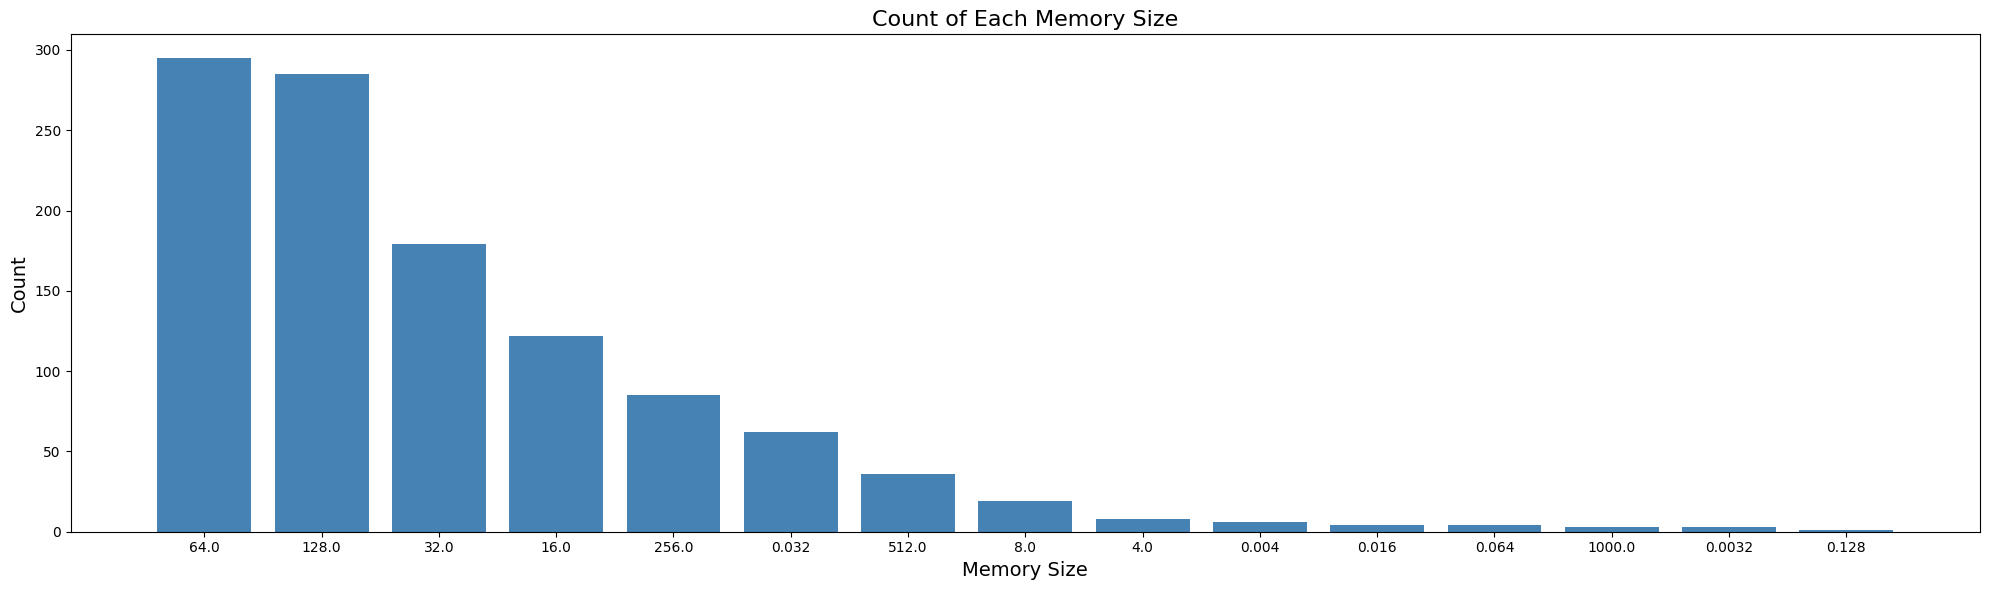

In [18]:
# Count frequency of each memory size
memory_counts = df['memory_size'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot with custom color
ax.bar(memory_counts.index.astype(str), memory_counts.values, color='steelblue')

# Set chart title and labels
ax.set_title('Count of Each Memory Size', fontsize=16)
ax.set_xlabel('Memory Size', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Improve layout and show
plt.tight_layout()
plt.show()


Wrong values


*   0.032
*   0.004
*   0.016
*   0.064
*   1000.0
*   0.0032
*   0.128

In [19]:
df[df['memory_size'] == 0.032]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
135,135,Ulefone,A1 Dual Black,Android,83,817.0,755.0,845.0,4,2.40,0.032,2000.0,2-2019
136,136,Ulefone,A1 Dual Gold,Android,384,834.0,719.0,1009.0,26,2.40,0.032,2000.0,2-2019
141,141,Astro,A144 Black/Red,Android,519,214.0,199.0,229.0,2,1.77,0.032,600.0,9-2019
151,151,Astro,A173 Black/Orange,Android,204,279.0,NaN,NaN,1,1.77,0.032,800.0,6-2018
152,152,Astro,A225 Black,Android,295,359.0,NaN,NaN,1,2.40,0.032,1000.0,6-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1110,Nomi,i281 Black,Android,26,733.0,647.0,888.0,29,2.80,0.032,1400.0,8-2017
1111,1111,Nomi,i281 Black,Android,95,733.0,647.0,888.0,29,2.80,0.032,1400.0,8-2017
1112,1112,Nomi,i281 Red,Android,308,741.0,636.0,998.0,29,2.80,0.032,1400.0,8-2017
1113,1113,Nomi,i282 Grey,Android,152,689.0,599.0,780.0,2,2.80,0.032,1200.0,9-2017


In [20]:
df[df['memory_size'] == 0.004]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
12,12,Nokia,105 DS 2019 Pink (16KIGP01A01),Android,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
15,15,Nokia,105 Dual Sim New Black (A00028315),Android,507,552.0,499.0,606.0,2,1.80,0.004,800.0,9-2017
18,18,Nokia,105 Single Sim New Black (A00028356),Android,460,663.0,499.0,1169.0,5,1.80,0.004,800.0,9-2017
19,19,Nokia,105 Single Sim New Black (A00028356),Android,455,663.0,499.0,1169.0,5,1.80,0.004,800.0,9-2017
20,20,Nokia,105 Single Sim New Blue (A00028372),Android,378,474.0,450.0,499.0,2,1.80,0.004,800.0,9-2017
21,21,Nokia,105 Single Sim New White (A00028371),Android,59,499.0,NaN,NaN,1,1.80,0.004,800.0,9-2017


In [21]:
df[df['memory_size'] == 0.016]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
60,60,Nokia,210 Dual SIM 2019 Black (16OTRB01A02),Android,464,1153.0,975.0,1199.0,20,2.4,0.016,1020.0,5-2019
61,61,Nokia,230 Dual Blue (16PCML01A02),Android,65,1864.0,1717.0,2229.0,33,2.8,0.016,1200.0,3-2019
62,62,Nokia,230 Dual Dark Silver (A00026971),Android,860,1847.0,1725.0,1939.0,54,2.8,0.016,1200.0,12-2015
83,83,Nokia,5310 2020 DualSim Black/Red (16PISXO1A18),Android,888,1365.0,1260.0,1419.0,46,2.4,0.016,1200.0,4-2020


In [22]:
df[df['memory_size'] == 0.064]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
185,185,Assistant,AS-201 Dual Sim Blue,Android,316,294.0,263.0,330.0,11,2.4,0.064,1500.0,12-2018
210,210,Astro,B200RX (White),Android,390,646.0,552.0,799.0,30,2.0,0.064,1300.0,5-2016
211,211,Astro,B200RX (Yellow),Android,599,655.0,532.0,799.0,28,2.0,0.064,1300.0,5-2016
1102,1102,Nomi,i240 (Black),Android,80,530.0,350.0,699.0,16,2.4,0.064,800.0,12-2014


In [23]:
df[df['memory_size'] == 0.128]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1032,1032,Philips,Xenium E580 Dual Sim Black,Android,975,1978.0,1599.0,2389.0,27,2.8,0.128,3100.0,2-2020


In [24]:
df[df['memory_size'] == 0.0032]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
980,980,Sigma mobile,X-treme DZ68 Black,Android,136,2066.0,2050.0,2099.0,3,2.4,0.0032,4500.0,10-2018
981,981,Sigma mobile,X-treme DZ68 Black-yellow,Android,289,2049.0,1999.0,2099.0,2,2.4,0.0032,4500.0,10-2018
982,982,Sigma mobile,X-treme DZ68 Black-yellow,Android,327,2049.0,1999.0,2099.0,2,2.4,0.0032,4500.0,10-2018


In [25]:
df[df['memory_size'] == 1000.0 ]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
482,482,Samsung,Galaxy S10+ SM-G975 DS 1TB Black (SM-G975FCKH),Android,847,22932.0,20995.0,47292.0,22,6.4,1000.0,4000.0,2-2019
483,483,Samsung,Galaxy S10+ SM-G975 DS 1TB Ceramic White (SM-G...,Android,795,23137.0,20995.0,47292.0,22,6.4,1000.0,4000.0,2-2019
490,490,Samsung,Galaxy S10+ SM-G9750 DS 1TB Black,Android,66,21454.0,20954.0,21954.0,3,6.4,1000.0,4000.0,2-2019


In [26]:
df[df['memory_size'] == 0.004 ]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
12,12,Nokia,105 DS 2019 Pink (16KIGP01A01),Android,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
15,15,Nokia,105 Dual Sim New Black (A00028315),Android,507,552.0,499.0,606.0,2,1.80,0.004,800.0,9-2017
18,18,Nokia,105 Single Sim New Black (A00028356),Android,460,663.0,499.0,1169.0,5,1.80,0.004,800.0,9-2017
19,19,Nokia,105 Single Sim New Black (A00028356),Android,455,663.0,499.0,1169.0,5,1.80,0.004,800.0,9-2017
20,20,Nokia,105 Single Sim New Blue (A00028372),Android,378,474.0,450.0,499.0,2,1.80,0.004,800.0,9-2017
21,21,Nokia,105 Single Sim New White (A00028371),Android,59,499.0,NaN,NaN,1,1.80,0.004,800.0,9-2017


نقوم بتعديل قيم الذاكرة الخاطئة بقيم منطقية


In [27]:
df['memory_size'] = df['memory_size'].replace(0.032, 32.0)
df['memory_size'] = df['memory_size'].replace(0.004, 4.0)
df['memory_size'] = df['memory_size'].replace(0.016, 16.0)
df['memory_size'] = df['memory_size'].replace(0.064, 64.0)
df['memory_size'] = df['memory_size'].replace(1000.0, 1024.0)
df['memory_size'] = df['memory_size'].replace(0.0032, 32.0)
df['memory_size'] = df['memory_size'].replace(0.128, 128.0)

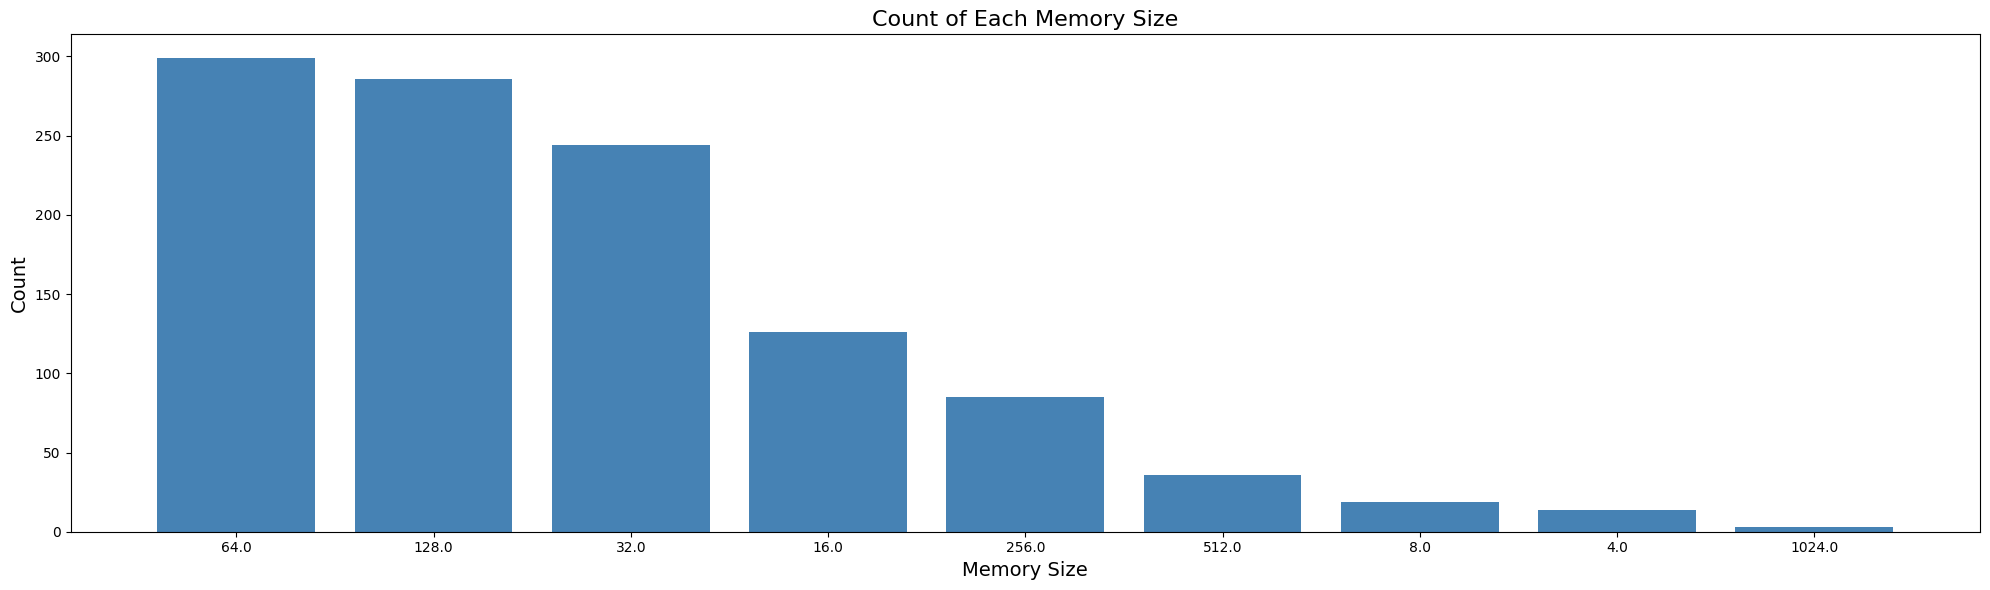

In [28]:
# Count frequency of each memory size
memory_counts = df['memory_size'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot with custom color
ax.bar(memory_counts.index.astype(str), memory_counts.values, color='steelblue')

# Set chart title and labels
ax.set_title('Count of Each Memory Size', fontsize=16)
ax.set_xlabel('Memory Size', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Improve layout and show
plt.tight_layout()
plt.show()


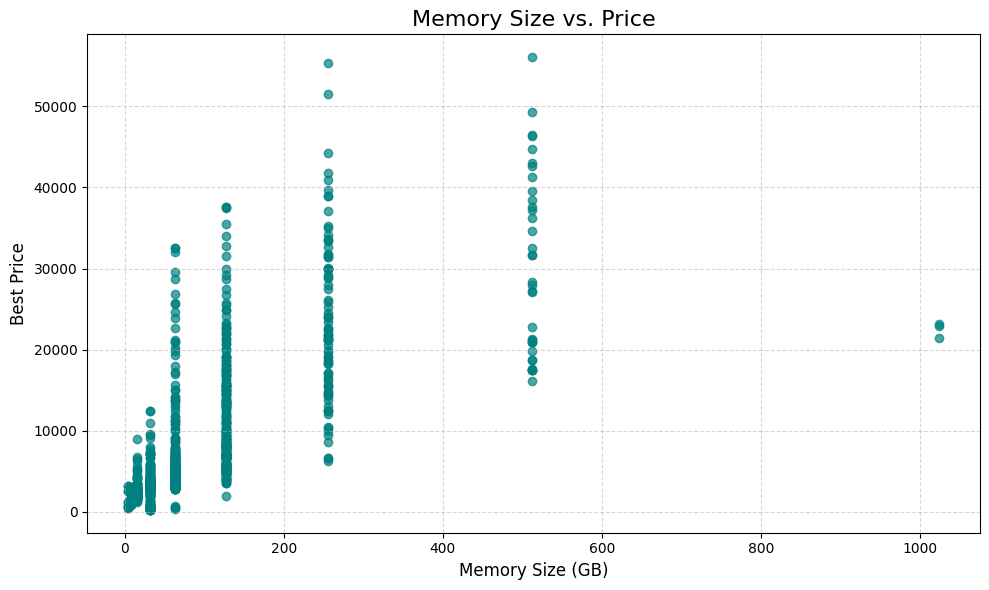

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use different color and marker style for visual variation
ax.scatter(df['memory_size'], df['best_price'], color='teal', marker='o', alpha=0.7)

# Add titles and labels
ax.set_title('Memory Size vs. Price', fontsize=16)
ax.set_xlabel('Memory Size (GB)', fontsize=12)
ax.set_ylabel('Best Price', fontsize=12)

# Add grid and tighter layout
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


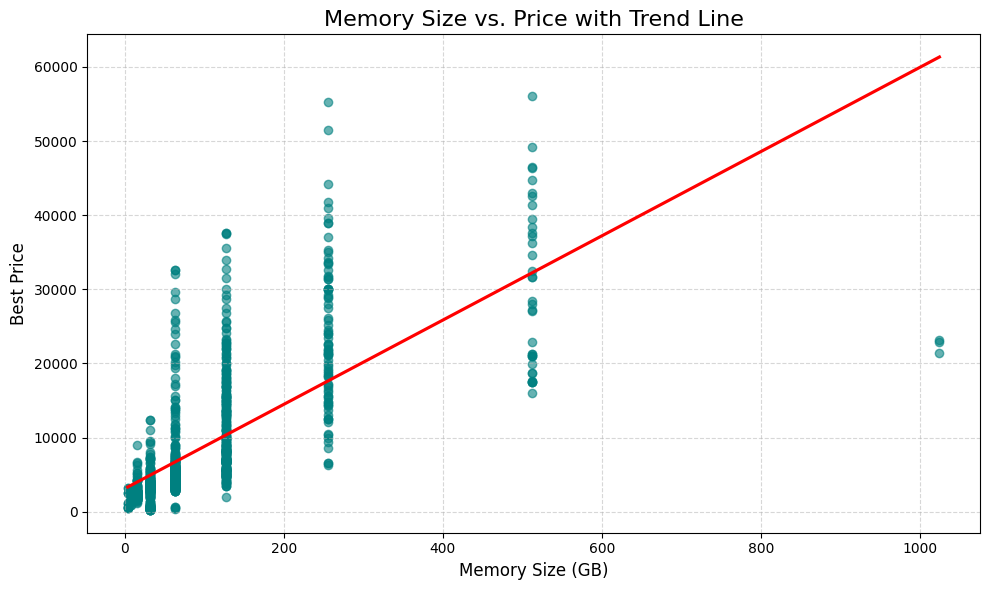

In [30]:
plt.figure(figsize=(10, 6))

# Scatter + trend line
sns.regplot(
    data=df,
    x='memory_size',
    y='best_price',
    scatter_kws={'color': 'teal', 'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None  # Remove confidence interval if not needed
)

# Titles and labels
plt.title('Memory Size vs. Price with Trend Line', fontsize=16)
plt.xlabel('Memory Size (GB)', fontsize=12)
plt.ylabel('Best Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

هنا نرى انه كل ما زادت الذاكرة يزيد السعر لكن ليس في جميع الحالات

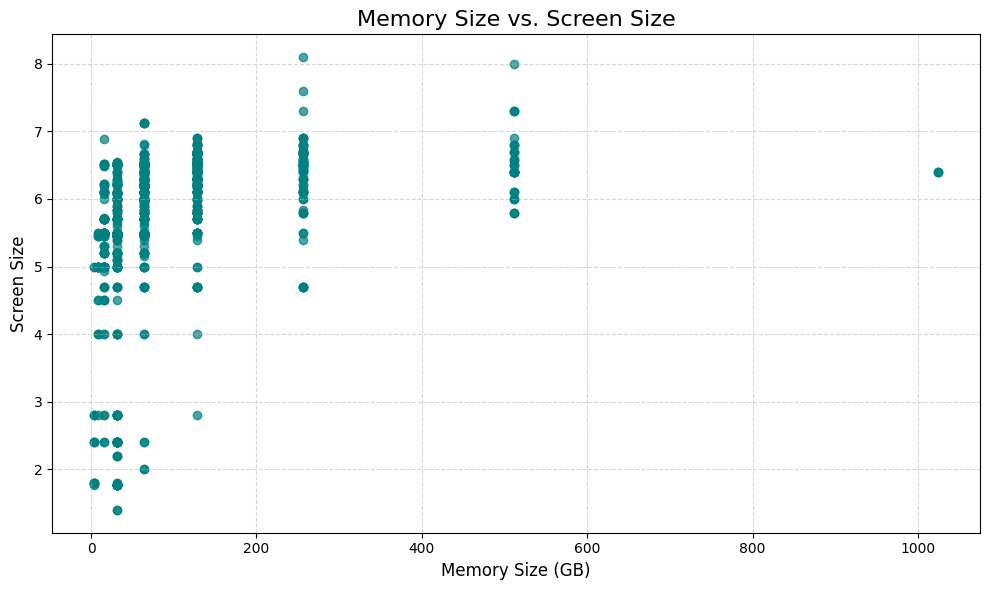

In [31]:

fig, ax = plt.subplots(figsize=(10, 6))

# Use different color and marker style for visual variation
ax.scatter(df['memory_size'], df['screen_size'], color='teal', marker='o', alpha=0.7)

# Add titles and labels
ax.set_title('Memory Size vs. Screen Size', fontsize=16)
ax.set_xlabel('Memory Size (GB)', fontsize=12)
ax.set_ylabel('Screen Size', fontsize=12)

# Add grid and tighter layout
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


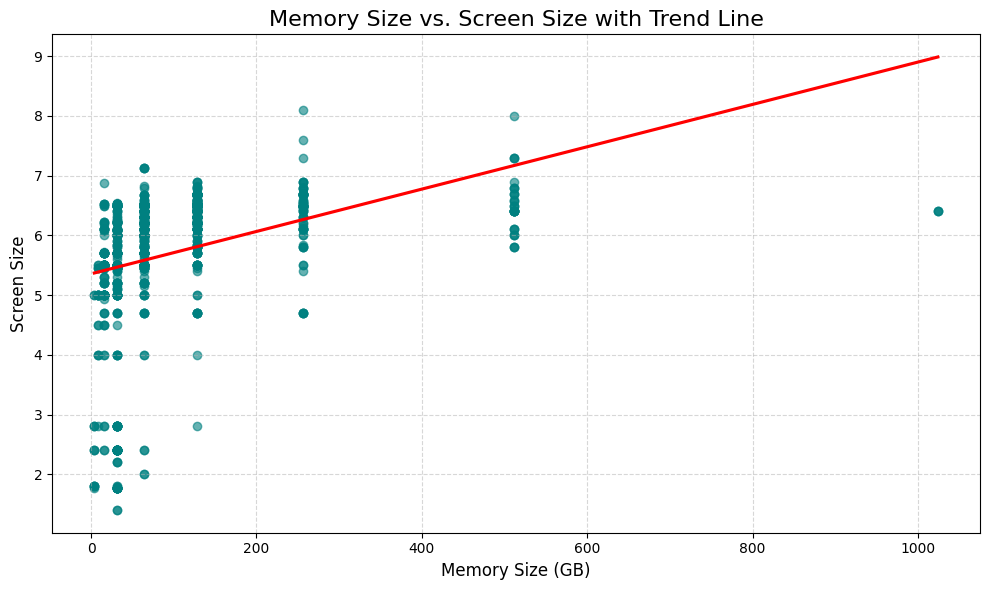

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x='memory_size',
    y='screen_size',
    scatter_kws={'color': 'teal', 'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None  # remove confidence interval shading
)

plt.title('Memory Size vs. Screen Size with Trend Line', fontsize=16)
plt.xlabel('Memory Size (GB)', fontsize=12)
plt.ylabel('Screen Size', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


هنا نرى انه لا علاقة لحجم الشاشة بالذاكرة

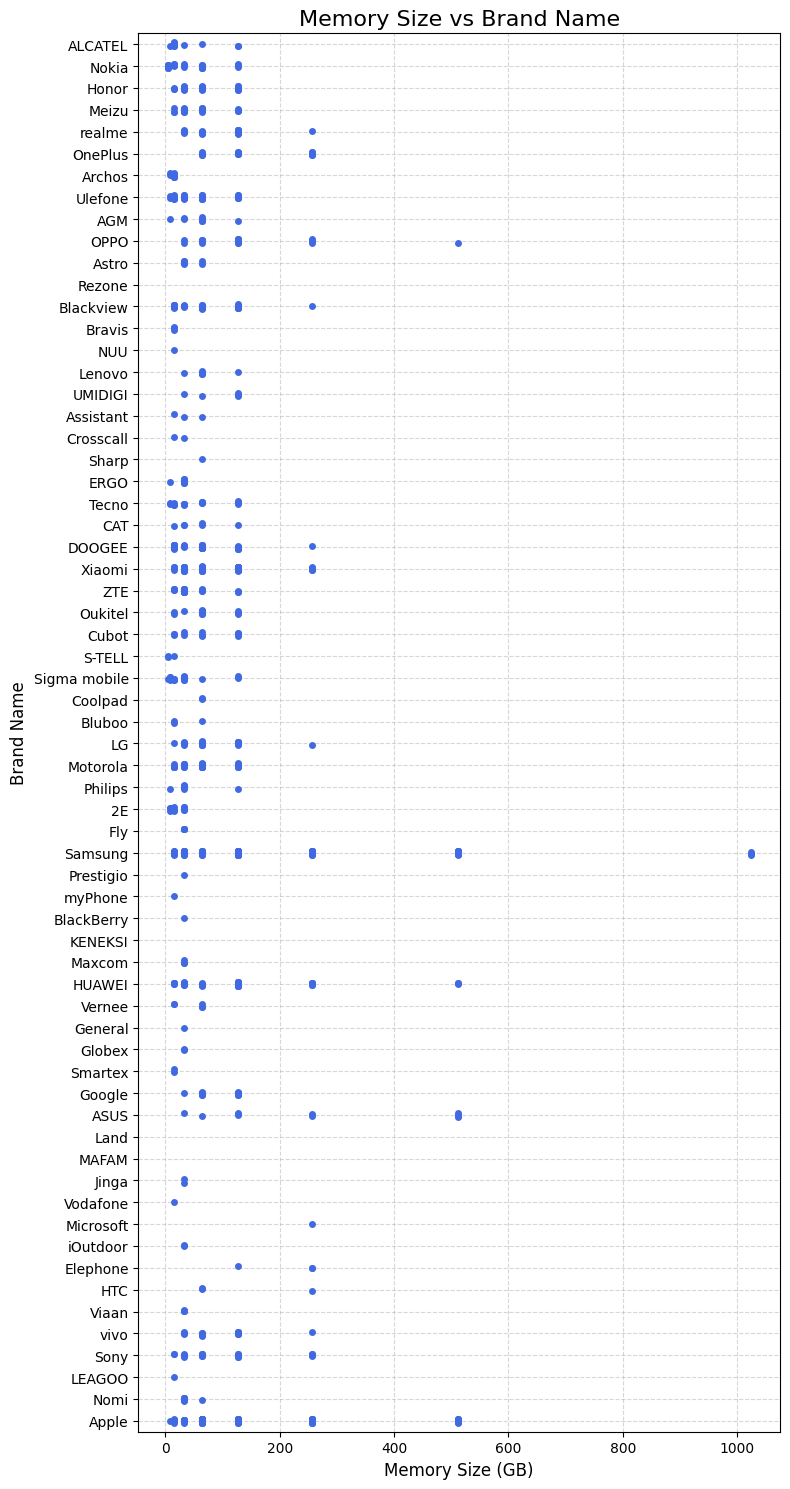

In [33]:
plt.figure(figsize=(8, 15))

# Use stripplot for categorical y-axis and numeric x-axis
sns.stripplot(
    data=df,
    x='memory_size',
    y='brand_name',
    color='royalblue',
    size=5,
    jitter=True  # Adds horizontal spread to avoid overlapping dots
)

# Set titles and labels
plt.title('Memory Size vs Brand Name', fontsize=16)
plt.xlabel('Memory Size (GB)', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Filling memory size

In [34]:
df.loc[df['memory_size'].isnull(), 'model_name'].value_counts()

model_name
A170 Point Dark Blue                       3
A167 Black/Red                             3
2003 Dual SIM Dark Gray (2003D-2AALUA1)    2
A170 Point Black                           2
105 Dual Sim 2019 Black (16KIGB01A01)      2
                                          ..
i284 Black                                 1
i284 Red                                   1
i284 Violet-blue                           1
i285 X-Treme Black-Yellow                  1
x-style 35 Screen                          1
Name: count, Length: 94, dtype: int64

In [35]:
median_memory_size = df.groupby('brand_name')['memory_size'].median()
median_memory_size

brand_name
2E           24.0
AGM          64.0
ALCATEL      16.0
ASUS        256.0
Apple       128.0
            ...  
ZTE          32.0
iOutdoor     32.0
myPhone      16.0
realme      128.0
vivo         64.0
Name: memory_size, Length: 64, dtype: float64

In [36]:
df['memory_size'] = df['memory_size'].fillna(df['brand_name'].map(median_memory_size))

In [37]:
df['memory_size'].isnull().sum()

np.int64(12)

In [38]:
df[df['memory_size'].isnull()]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
146,146,Rezone,A170 Point Black,Android,411,252.0,220.0,333.0,20,1.77,NaN,600.0,4-2019
147,147,Rezone,A170 Point Black,Android,401,252.0,220.0,333.0,20,1.77,NaN,600.0,4-2019
148,148,Rezone,A170 Point Dark Blue,Android,106,252.0,220.0,333.0,20,1.77,NaN,600.0,4-2019
149,149,Rezone,A170 Point Dark Blue,Android,131,252.0,220.0,333.0,20,1.77,NaN,600.0,4-2019
150,150,Rezone,A170 Point Dark Blue,Android,156,252.0,220.0,333.0,20,1.77,NaN,600.0,4-2019
154,154,Rezone,A240 Experience Red,Android,63,308.0,289.0,364.0,19,2.40,NaN,800.0,4-2019
155,155,Rezone,A281 Force Black,Android,947,632.0,532.0,1143.0,23,2.80,NaN,6000.0,4-2019
569,569,KENEKSI,M1 Art (Red),Android,6,610.0,NaN,NaN,1,1.77,NaN,650.0,10-2015
854,854,Land,Rover Tank T3 KUH Black,Android,698,1382.0,1381.0,1383.0,2,2.40,NaN,15800.0,6-2020
861,861,Rezone,S240 Age Black Orange,Android,451,499.0,NaN,NaN,4,2.40,NaN,800.0,9-2019


In [39]:
median_memory_size = df.groupby('screen_size')['memory_size'].median()
median_memory_size

screen_size
1.40     32.0
1.44     32.0
1.77     32.0
1.80      4.0
2.00     48.0
        ...  
7.12     64.0
7.30    512.0
7.60    256.0
8.00    512.0
8.10    256.0
Name: memory_size, Length: 83, dtype: float64

In [40]:
def fill_missing_memory_size2(row, median_memory_size):
    if pd.isna(row['memory_size']):
        return median_memory_size[row['screen_size']]
    else:
        return row['memory_size']
df['memory_size'] = df.apply(lambda row: fill_missing_memory_size2(row, median_memory_size), axis=1)

In [41]:
df['memory_size'].isnull().sum()

np.int64(1)

In [42]:
df[df['memory_size'].isnull()]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
897,897,MAFAM,SUN6 Blue,Android,282,899.0,NaN,NaN,1,3.0,NaN,18800.0,12-2019


In [43]:
df['memory_size'][897] = 8.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24704\1460630681.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['memory_size'][897] = 8.0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24704\1460630681.py:1: SettingWithCopyWarning: 
A value i

In [44]:
df['memory_size'].isnull().sum()

np.int64(0)

### lowest_price & highest_price

سنعتمد على العامود price في تحديد السعر
لذلك سنقوم بحذف


*   lowest_price
*   lowest_price

وايضا العامود Unnamed 0 لأنو نفسو ال index



In [45]:
df = df.drop(columns=['lowest_price', 'highest_price','Unnamed: 0'])

In [46]:
info_df = pd.DataFrame()
info_df['missing_val'] = df.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)
info_df

,missing_val,missing_val_ratio
brand_name,0,0
model_name,0,0
os,0,0
popularity,0,0
best_price,0,0
sellers_amount,0,0
screen_size,0,0
memory_size,0,0
battery_size,0,0
release_date,0,0


هنا نرى انه تخلصنا من جميع القيم ال null

## Detect Outliers

In [47]:
df.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

IQR (Interquartile Range) Method

In [48]:
def find_outliers_iqr(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    bounds = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
    is_outlier = (df[column] < bounds[0]) | (df[column] > bounds[1])
    return df[is_outlier]


Z-score method

In [49]:
def detect_outliers(df, column):
  mean = df[column].mean()
  std = df[column].std()
  df[column + '_z_scores'] = df[column].apply(lambda x: abs(x - mean) / std)
  return df[df[column + '_z_scores'] > 3][column]

call detect_outliers on numeral columns

In [50]:
detect_outliers(df,'popularity')

Series([], Name: popularity, dtype: int64)

popularity does not have outliers values

In [51]:
detect_outliers(df,'battery_size')

190    10300.0
191    10300.0
236    13000.0
237    10000.0
238    10000.0
239    10000.0
552    10000.0
553    10000.0
554    11000.0
555    11000.0
556    11000.0
557    11000.0
854    15800.0
886    10000.0
897    18800.0
945    10000.0
946    10000.0
949    10000.0
950    10000.0
959     9000.0
960     9000.0
994     9000.0
Name: battery_size, dtype: float64

battery_size have outliers values

In [52]:
detect_outliers(df,'screen_size')

Series([], Name: screen_size, dtype: float64)

screen_size does not have outliers values

Boxplot function to draw outliers

In [53]:
def draw_boxplot(outliers, title, ylabel, xlabel, column):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='green'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=8, linestyle='none'))

    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks([1], [column], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f"Outliers in '{column}':")
    display(outliers)


best_price outliers

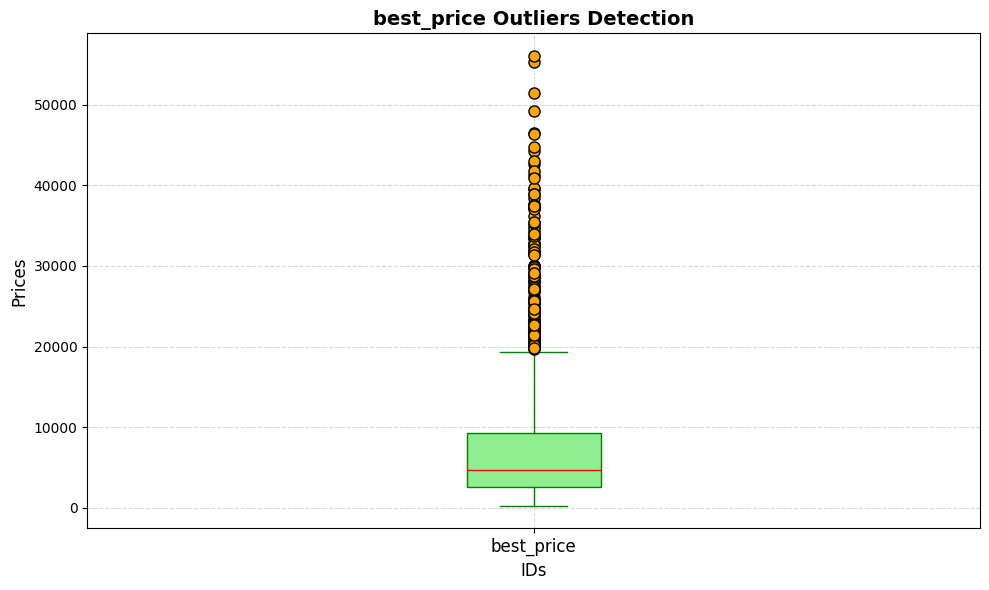

Outliers in 'best_price':


432     55338.0
433     41310.0
434     37640.0
435     37173.0
474     39524.0
515     37630.0
516     39620.0
517     42649.0
542     35015.0
543     51460.0
600     56082.0
915     44232.0
1129    36188.0
1130    34617.0
1133    38918.0
1134    35280.0
1135    42968.0
1136    38447.0
1146    35507.0
1148    38912.0
1149    37068.0
1150    46503.0
1151    44716.0
1152    37574.0
1153    37455.0
1154    41729.0
1155    40910.0
1156    49242.0
1157    46325.0
Name: best_price, dtype: float64

In [54]:
outliers = detect_outliers(df,'best_price')
draw_boxplot(outliers,'best_price Outliers Detection',"Prices",'IDs',"best_price")

sellers_amount outliers

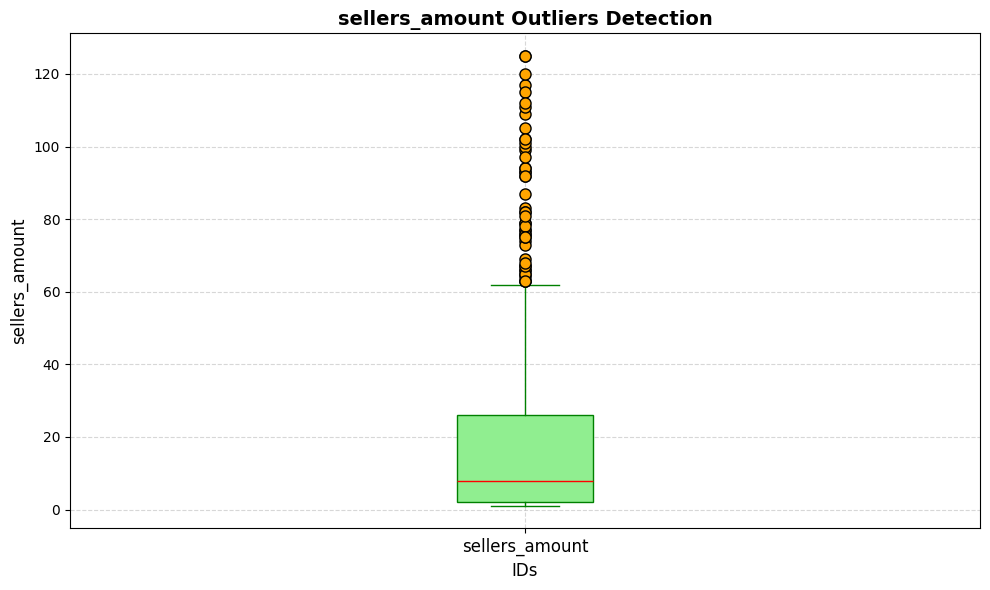

Outliers in 'sellers_amount':


399      92
408      83
423      79
499      79
512      87
842      99
843     102
963     109
1119    100
1124     93
1128     94
1134     82
1140    125
1142     93
1144    117
1147    101
1149     94
1151     82
1153    115
1155    120
1157     92
1158    111
1159     81
1160    112
1196     97
1200    105
1207    102
1210    125
Name: sellers_amount, dtype: int64

In [55]:
outlierSell = detect_outliers(df,'sellers_amount')
draw_boxplot(outlierSell,'sellers_amount Outliers Detection',"sellers_amount",'IDs',"sellers_amount")

memory_size outliers

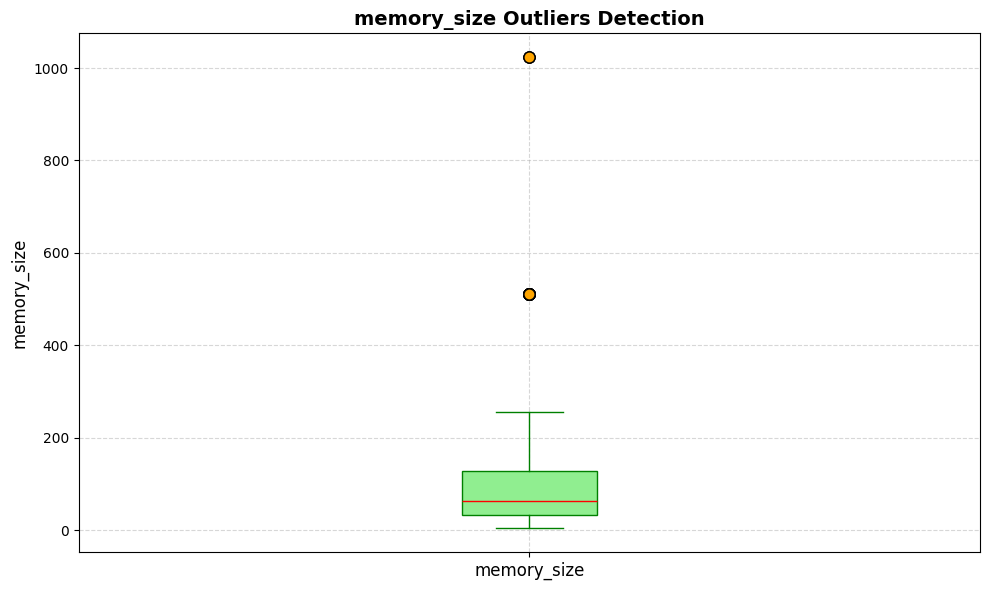

Outliers in 'memory_size':


357      512.0
433      512.0
434      512.0
435      512.0
454      512.0
456      512.0
461      512.0
462      512.0
463      512.0
464      512.0
465      512.0
466      512.0
474      512.0
479      512.0
482     1024.0
483     1024.0
484      512.0
485      512.0
486      512.0
487      512.0
490     1024.0
517      512.0
600      512.0
708      512.0
709      512.0
757      512.0
758      512.0
759      512.0
760      512.0
1129     512.0
1130     512.0
1135     512.0
1136     512.0
1150     512.0
1151     512.0
1156     512.0
1157     512.0
1215     512.0
1218     512.0
Name: memory_size, dtype: float64

In [56]:
outliermemeory = detect_outliers(df,'memory_size')
draw_boxplot(outliermemeory,'memory_size Outliers Detection',"memory_size",'',"memory_size")

###Handling Outliers
There are three common methods for handling outliers: removal, capping, transformation, and imputation.

###Capping Outliers
Capping involves limiting extreme values by setting upper and lower bounds based on percentiles. For example, values above the 95th percentile can be replaced with the 95th percentile value, and values below the 5th percentile can be set to the 5th percentile value. This technique reduces the influence of outliers while preserving all data points in the dataset.

### Transforming Outliers
Transformation involves applying mathematical functions to the data to lessen the influence of outliers. Common transformations include taking the logarithm, square root, or cube root of the values. These methods compress the data scale, making extreme values less prominent and improving the overall distribution.

###Imputation
Imputation involves replacing outlier values with estimated values based on the rest of the data. Common imputation methods include substituting outliers with the mean, median, or mode of the dataset. This approach helps retain the data structure and size while minimizing the distortion caused by extreme values.

In [57]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    return data

In [58]:
def handle_outliers(df, column, method='remove'):
    outliers = detect_outliers(df, column)

    if method == 'remove':
        df_cleaned = df[~df.index.isin(outliers.index)]
        return df_cleaned
    elif method == 'cap':
        return cap_outliers(df, column)
    elif method == 'transform':
        df['log_transformed'] = np.log(df[column] + 1)
        return df
    elif method == 'impute':
        median_value = df[column].median()
        df.loc[outliers.index, column] = median_value
        return df
    else:
        raise ValueError("Method must be 'remove', 'cap', 'transform', or 'impute'.")


Here for *memory_size* column we used impute method to remove outliers

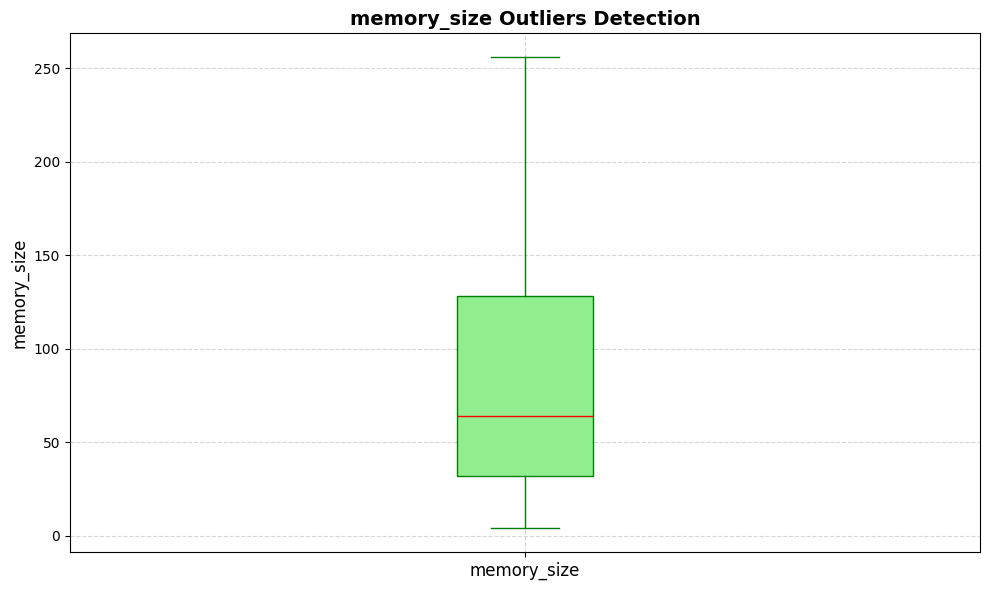

Outliers in 'memory_size':


357      512.0
433      512.0
434      512.0
435      512.0
454      512.0
456      512.0
461      512.0
462      512.0
463      512.0
464      512.0
465      512.0
466      512.0
474      512.0
479      512.0
482     1024.0
483     1024.0
484      512.0
485      512.0
486      512.0
487      512.0
490     1024.0
517      512.0
600      512.0
708      512.0
709      512.0
757      512.0
758      512.0
759      512.0
760      512.0
1129     512.0
1130     512.0
1135     512.0
1136     512.0
1150     512.0
1151     512.0
1156     512.0
1157     512.0
1215     512.0
1218     512.0
Name: memory_size, dtype: float64

In [59]:
df = handle_outliers(df,'memory_size',method='impute')
draw_boxplot(outliermemeory,'memory_size Outliers Detection',"memory_size",'',"memory_size")

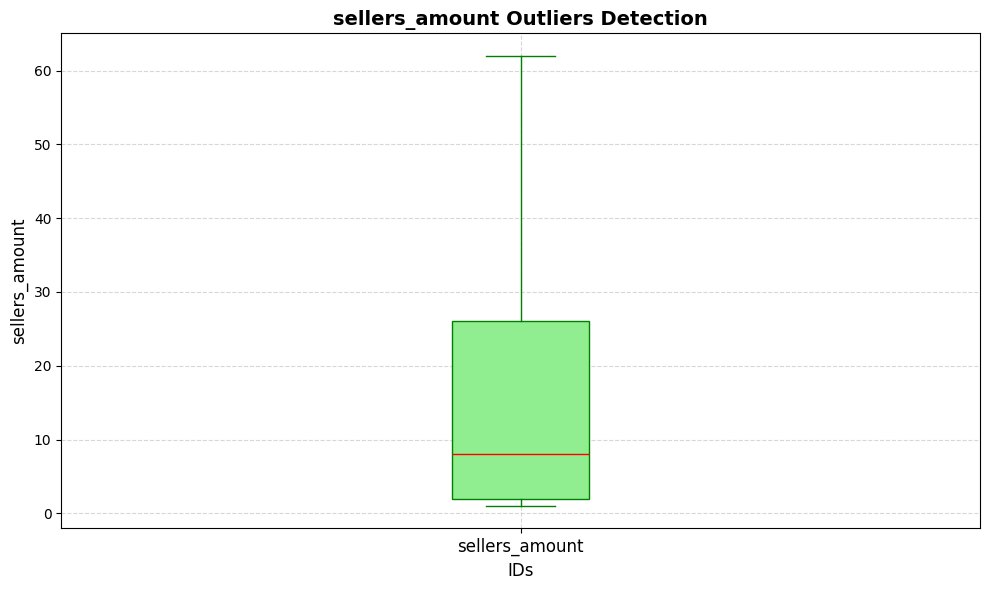

Outliers in 'sellers_amount':


399      92
408      83
423      79
499      79
512      87
842      99
843     102
963     109
1119    100
1124     93
1128     94
1134     82
1140    125
1142     93
1144    117
1147    101
1149     94
1151     82
1153    115
1155    120
1157     92
1158    111
1159     81
1160    112
1196     97
1200    105
1207    102
1210    125
Name: sellers_amount, dtype: int64

In [60]:
handle_outliers(df,'sellers_amount',method='cap')

draw_boxplot(outlierSell,'sellers_amount Outliers Detection',"sellers_amount",'IDs',"sellers_amount")

Here for *best price* column we used capping method to remove outliers

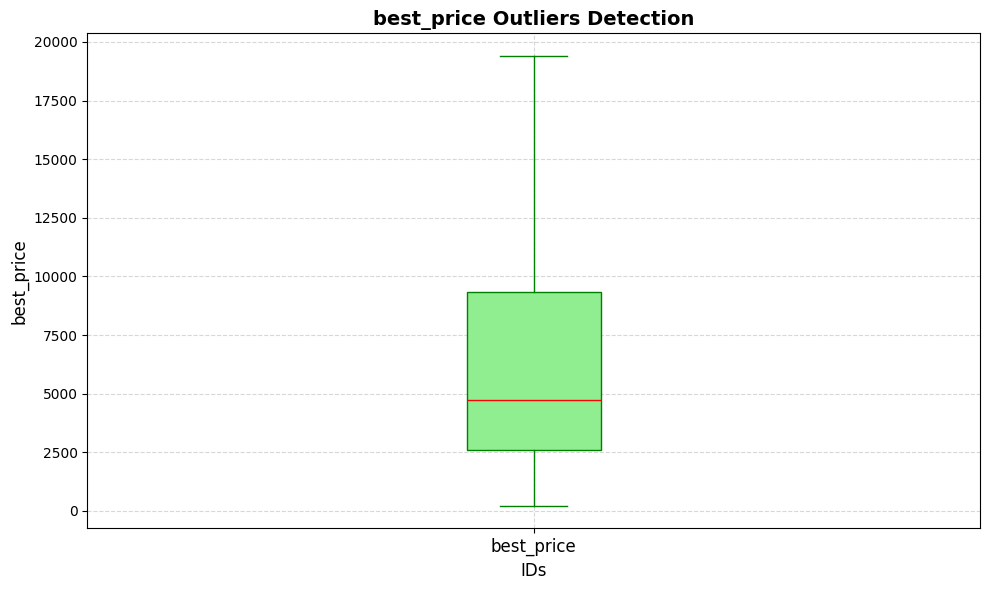

Outliers in 'best_price':


432     55338.0
433     41310.0
434     37640.0
435     37173.0
474     39524.0
515     37630.0
516     39620.0
517     42649.0
542     35015.0
543     51460.0
600     56082.0
915     44232.0
1129    36188.0
1130    34617.0
1133    38918.0
1134    35280.0
1135    42968.0
1136    38447.0
1146    35507.0
1148    38912.0
1149    37068.0
1150    46503.0
1151    44716.0
1152    37574.0
1153    37455.0
1154    41729.0
1155    40910.0
1156    49242.0
1157    46325.0
Name: best_price, dtype: float64

In [61]:
handle_outliers(df,'best_price',method='cap')

draw_boxplot(outliers,'best_price Outliers Detection',"best_price",'IDs',"best_price")

##clustering

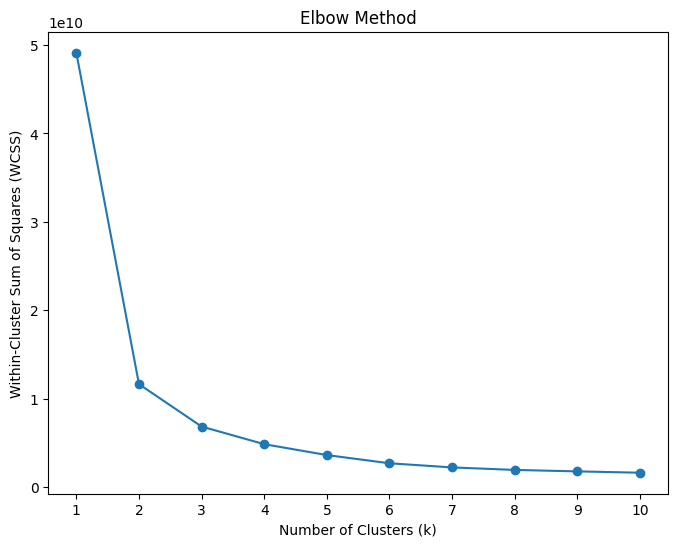

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select only numerical columns from the dataframe
numerical_df = df.select_dtypes(include='number')

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
max_clusters = 10  # Maximum number of clusters to consider
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values and the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.xticks(range(1, max_clusters+1))
plt.show()

In [63]:
X =df[['memory_size', 'best_price']]
X

,memory_size,best_price
0,8.0,1690.000
1,16.0,1803.000
2,16.0,1803.000
3,16.0,1803.000
4,16.0,1999.000
...,...,...
1219,64.0,19407.875
1220,64.0,19407.875
1221,128.0,8804.000
1222,128.0,18755.000


In [64]:
X = numerical_df[['memory_size', 'best_price']]

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, ..., 1, 0, 2], dtype=int32)

In [65]:
X

,memory_size,best_price
0,8.0,1690.000
1,16.0,1803.000
2,16.0,1803.000
3,16.0,1803.000
4,16.0,1999.000
...,...,...
1219,64.0,19407.875
1220,64.0,19407.875
1221,128.0,8804.000
1222,128.0,18755.000


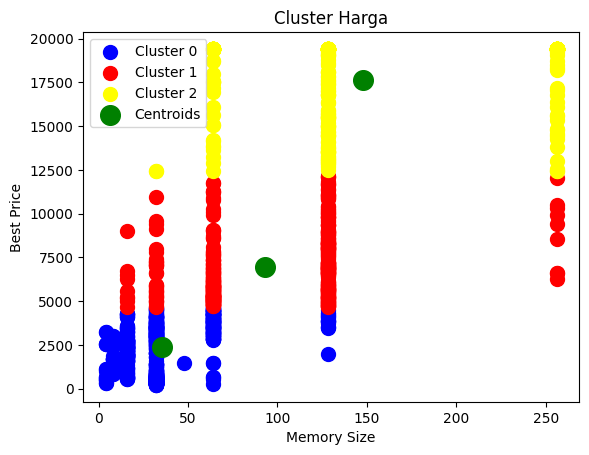

In [66]:
df['cluster'] = y_kmeans
cluster_avg_price = df.groupby('cluster')['best_price'].mean().sort_values()
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_avg_price.index)}
df['ordered_cluster'] = df['cluster'].map(cluster_mapping)
df.drop(columns=['cluster'], inplace=True)

plt.scatter(X[df['ordered_cluster'] == 0]['memory_size'], X[df['ordered_cluster'] == 0]['best_price'], s=100, c='blue', label='Cluster 0')
plt.scatter(X[df['ordered_cluster'] == 1]['memory_size'], X[df['ordered_cluster'] == 1]['best_price'], s=100, c='red', label='Cluster 1')
plt.scatter(X[df['ordered_cluster'] == 2]['memory_size'], X[df['ordered_cluster'] == 2]['best_price'], s=100, c='yellow', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='green', label='Centroids')
plt.title('Cluster Harga')
plt.xlabel('Memory Size')
plt.ylabel('Best Price')
plt.legend()
plt.show()

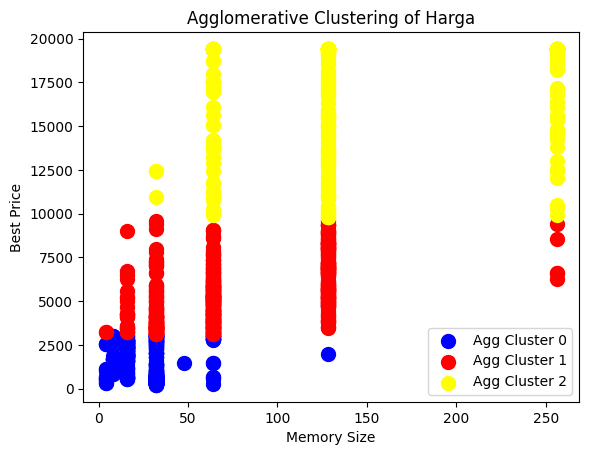

In [67]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X)

df['agg_cluster'] = y_agg

agg_cluster_avg_price = df.groupby('agg_cluster')['best_price'].mean().sort_values()

agg_cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(agg_cluster_avg_price.index)}

df['ordered_agg_cluster'] = df['agg_cluster'].map(agg_cluster_mapping)

df.drop(columns=['agg_cluster'], inplace=True)

plt.scatter(X[df['ordered_agg_cluster'] == 0]['memory_size'], X[df['ordered_agg_cluster'] == 0]['best_price'], s=100, c='blue', label='Agg Cluster 0')
plt.scatter(X[df['ordered_agg_cluster'] == 1]['memory_size'], X[df['ordered_agg_cluster'] == 1]['best_price'], s=100, c='red', label='Agg Cluster 1')
plt.scatter(X[df['ordered_agg_cluster'] == 2]['memory_size'], X[df['ordered_agg_cluster'] == 2]['best_price'], s=100, c='yellow', label='Agg Cluster 2')
plt.title('Agglomerative Clustering of Harga')
plt.xlabel('Memory Size')
plt.ylabel('Best Price')
plt.legend()
plt.show()

# Machine Learning

## Data preprocessing

نقوم بحذف عامود

ordered_agg_cluster

وذلك لاننا سنعتمد على نتائج

kmeans

في عملية التصنيف السعري لاجهزة المحمول

لانها تعطي مجالات افضل و اكثر منطقية كما تبين من المخططات السابقة

In [68]:
df.drop(columns=['ordered_agg_cluster'], inplace=True)

وجدنا سابقا ان هناك اعمدة تحمل قيم من انواع غير رقمية لذا يجب معالجتها اولا

In [69]:
df

,brand_name,model_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,release_date,popularity_z_scores,battery_size_z_scores,screen_size_z_scores,best_price_z_scores,sellers_amount_z_scores,memory_size_z_scores,ordered_cluster
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.000,36,5.00,8.0,2000.0,10-2020,0.538923,0.959481,0.266232,0.703028,0.934919,0.778882,0
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.000,36,5.00,16.0,2000.0,9-2020,0.818993,0.959481,0.266232,0.690319,0.934919,0.704494,0
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.000,36,5.00,16.0,2000.0,9-2020,0.886889,0.959481,0.266232,0.690319,0.934919,0.704494,0
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.000,36,5.00,16.0,2000.0,9-2020,0.920837,0.959481,0.266232,0.690319,0.934919,0.704494,0
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.000,10,5.71,16.0,3000.0,4-2020,1.229197,0.362638,0.213452,0.668277,0.327400,0.704494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,19407.875,61,6.50,64.0,3174.0,9-2018,1.381963,0.258787,0.747185,1.658127,2.148688,0.258169,2
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,19407.875,28,6.50,64.0,3174.0,9-2018,0.233392,0.258787,0.747185,1.873493,0.546513,0.258169,2
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.000,18,6.26,128.0,3750.0,11-2019,1.588480,0.084994,0.585038,0.097032,0.061006,0.336932,1
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.000,2,6.65,128.0,4500.0,10-2020,0.394645,0.532626,0.848527,1.216148,0.715806,0.336932,2


In [70]:
def get_year(date_str):
    date_obj = datetime.strptime(date_str, '%m-%Y')
    return date_obj.year

def get_month(date_str):
    date_obj = datetime.strptime(date_str, '%m-%Y')
    return date_obj.month

In [71]:
df['release_year']=df['release_date'].apply(get_year)
df['release_month']=df['release_date'].apply(get_month)
df.drop(columns=['release_date'],inplace=True)

In [72]:
df

,brand_name,model_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,popularity_z_scores,battery_size_z_scores,screen_size_z_scores,best_price_z_scores,sellers_amount_z_scores,memory_size_z_scores,ordered_cluster,release_year,release_month
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.000,36,5.00,8.0,2000.0,0.538923,0.959481,0.266232,0.703028,0.934919,0.778882,0,2020,10
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.000,36,5.00,16.0,2000.0,0.818993,0.959481,0.266232,0.690319,0.934919,0.704494,0,2020,9
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.000,36,5.00,16.0,2000.0,0.886889,0.959481,0.266232,0.690319,0.934919,0.704494,0,2020,9
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.000,36,5.00,16.0,2000.0,0.920837,0.959481,0.266232,0.690319,0.934919,0.704494,0,2020,9
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.000,10,5.71,16.0,3000.0,1.229197,0.362638,0.213452,0.668277,0.327400,0.704494,0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,19407.875,61,6.50,64.0,3174.0,1.381963,0.258787,0.747185,1.658127,2.148688,0.258169,2,2018,9
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,19407.875,28,6.50,64.0,3174.0,0.233392,0.258787,0.747185,1.873493,0.546513,0.258169,2,2018,9
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.000,18,6.26,128.0,3750.0,1.588480,0.084994,0.585038,0.097032,0.061006,0.336932,1,2019,11
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.000,2,6.65,128.0,4500.0,0.394645,0.532626,0.848527,1.216148,0.715806,0.336932,2,2020,10


In [73]:
##  ONE HOT ##
include_columns = [
    'brand_name', 'os'
]
df_to_include = df[include_columns]
df_encoded = pd.get_dummies(df_to_include)
df_new=df.drop(columns=['brand_name', 'model_name', 'os'])
df_combined = pd.concat([df_new, df_encoded], axis=1)

In [97]:
df_combined

,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,popularity_z_scores,battery_size_z_scores,screen_size_z_scores,best_price_z_scores,...,brand_name_iOutdoor,brand_name_myPhone,brand_name_realme,brand_name_vivo,os_Android,os_EMUI,os_KAIOS,os_OxygenOS,os_WindowsPhone,os_iOS
0,422,1690.000,36,5.00,8.0,2000.0,0.538923,0.959481,0.266232,0.703028,...,False,False,False,False,True,False,False,False,False,False
1,323,1803.000,36,5.00,16.0,2000.0,0.818993,0.959481,0.266232,0.690319,...,False,False,False,False,True,False,False,False,False,False
2,299,1803.000,36,5.00,16.0,2000.0,0.886889,0.959481,0.266232,0.690319,...,False,False,False,False,True,False,False,False,False,False
3,287,1803.000,36,5.00,16.0,2000.0,0.920837,0.959481,0.266232,0.690319,...,False,False,False,False,True,False,False,False,False,False
4,1047,1999.000,10,5.71,16.0,3000.0,1.229197,0.362638,0.213452,0.668277,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,1101,19407.875,61,6.50,64.0,3174.0,1.381963,0.258787,0.747185,1.658127,...,False,False,False,False,False,False,False,False,False,True
1220,530,19407.875,28,6.50,64.0,3174.0,0.233392,0.258787,0.747185,1.873493,...,False,False,False,False,False,False,False,False,False,True
1221,1174,8804.000,18,6.26,128.0,3750.0,1.588480,0.084994,0.585038,0.097032,...,False,False,False,False,True,False,False,False,False,False
1222,752,18755.000,2,6.65,128.0,4500.0,0.394645,0.532626,0.848527,1.216148,...,False,False,False,False,True,False,False,False,False,False


## Feature selection

In [74]:
## correletion matrix (on train data only)
from sklearn.model_selection import train_test_split
X = df_combined.drop(columns=['ordered_cluster'])
y = df_combined['ordered_cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.drop(columns=['best_price','best_price_z_scores'],inplace=True)

In [76]:
X_train_1 = pd.concat([X_train, y_train], axis=1)

In [77]:
correlation_matrix = X_train_1.corr()
print(correlation_matrix['ordered_cluster'].sort_values(ascending=False))

ordered_cluster          1.000000
memory_size              0.700925
screen_size              0.492948
brand_name_Apple         0.372481
os_iOS                   0.367263
                           ...   
screen_size_z_scores    -0.213259
os_Android              -0.363870
brand_name_BlackBerry         NaN
brand_name_Smartex            NaN
os_KAIOS                      NaN
Name: ordered_cluster, Length: 83, dtype: float64


In [78]:
len(correlation_matrix)

83

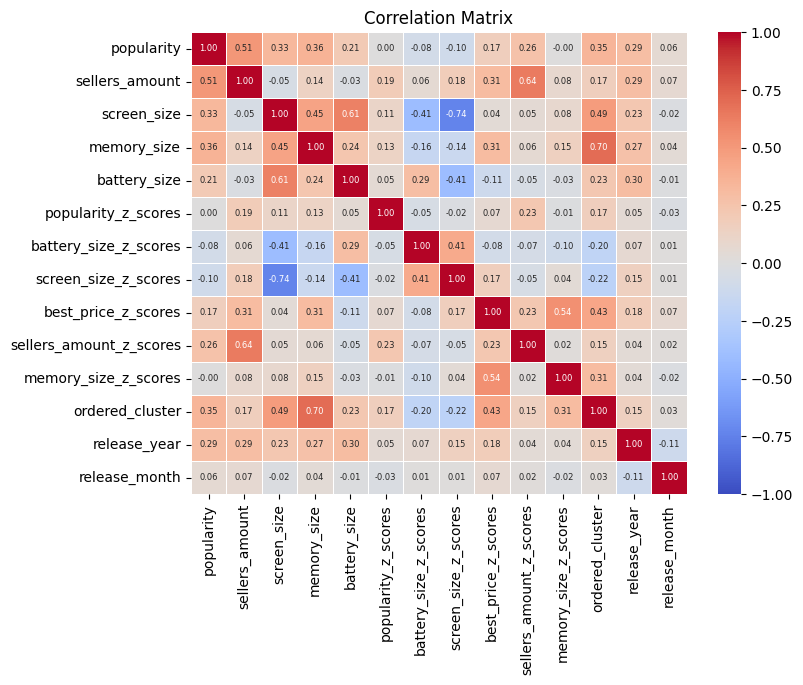

In [79]:
numerical_df = df.select_dtypes(include='number').drop(columns=['best_price'])

corr_matrix = numerical_df.corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5,
            annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

In [80]:
# models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier' :KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

In [81]:
## try models and select features based on results
################################################## Normal correlation features
normal_corr_features = correlation_matrix.index[abs(correlation_matrix['ordered_cluster']) > 0.4].tolist()
normal_corr_features.remove('ordered_cluster')

X = X_train_1[normal_corr_features]
y = y_train
# split data
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for model_name, model in models.items():
    model.fit(X_train_temp, y_train_temp)
    y_pred = model.predict(X_test_temp)
    acc=accuracy_score(y_test_temp, y_pred)
    results.append({'Model': model_name, 'Experiment': 'Normal correlation features','accuracy_score':acc})
################################################## all features (without outlier)
X = X_train_1.drop(columns=['popularity', 'sellers_amount', 'screen_size', 'memory_size','battery_size'])
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train_temp, y_train_temp)
    X_test_temp = np.ascontiguousarray(X_test_temp)
    y_pred = model.predict(X_test_temp)
    acc=accuracy_score(y_test_temp, y_pred)
    results.append({'Model': model_name, 'Experiment': 'All features (without outlier)','accuracy_score':acc})
################################################## all features (with outlier)
X = X_train_1.drop(columns=['popularity_z_scores', 'sellers_amount_z_scores', 'screen_size_z_scores', 'memory_size_z_scores','battery_size_z_scores'])
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train_temp, y_train_temp)
    X_test_temp = np.ascontiguousarray(X_test_temp)
    y_pred = model.predict(X_test_temp)
    acc=accuracy_score(y_test_temp, y_pred)
    results.append({'Model': model_name, 'Experiment': 'All features (with outlier)','accuracy_score':acc})

################################################## Very high correlation features
very_high_corr_features = correlation_matrix.index[abs(correlation_matrix['ordered_cluster']) > 0.7].tolist()
very_high_corr_features.remove('ordered_cluster')

X = X_train_1[very_high_corr_features]
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train_temp, y_train_temp)
    X_test_temp = np.ascontiguousarray(X_test_temp)
    y_pred = model.predict(X_test_temp)
    acc=accuracy_score(y_test_temp, y_pred)
    results.append({'Model': model_name, 'Experiment': 'Very high correlation features','accuracy_score':acc})
results_df = pd.DataFrame(results)
results_df

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs f

,Model,Experiment,accuracy_score
0,Logistic Regression,Normal correlation features,0.683673
1,Random Forest,Normal correlation features,0.765306
2,KNeighborsClassifier,Normal correlation features,0.739796
3,DecisionTreeClassifier,Normal correlation features,0.734694
4,Logistic Regression,All features (without outlier),1.000000
5,Random Forest,All features (without outlier),1.000000
6,KNeighborsClassifier,All features (without outlier),0.918367
7,DecisionTreeClassifier,All features (without outlier),1.000000
8,Logistic Regression,All features (with outlier),1.000000
9,Random Forest,All features (with outlier),1.000000


In [82]:
X = df_combined.drop(columns=['ordered_cluster','best_price','best_price_z_scores'
, 'popularity', 'sellers_amount', 'screen_size', 'memory_size','battery_size'
                              ]
                     )
y = df_combined['ordered_cluster']

X_copy = df_combined.drop(columns=['ordered_cluster','best_price','best_price_z_scores'
, 'popularity_z_scores', 'sellers_amount_z_scores', 'screen_size_z_scores', 'memory_size_z_scores','battery_size_z_scores'
                              ]
                     )

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results_all = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    results_all.append({'Model': model_name, 'accuracy_score':acc})
results_df_all = pd.DataFrame(results_all)
results_df_all

,Model,accuracy_score
0,Logistic Regression,0.685714
1,Random Forest,0.857143
2,KNeighborsClassifier,0.734694
3,DecisionTreeClassifier,0.791837


## training model

In [84]:
print( 'X_train Shape :',X_train.shape)
print( 'X_test Shape :',X_test.shape)
print( 'y_train Shape :',y_train.shape)
print( 'y_test Shape :',y_test.shape)

X_train Shape : (979, 77)
X_test Shape : (245, 77)
y_train Shape : (979,)
y_test Shape : (245,)


Training Logistic Regression...
[[106   9   2]
 [ 50  20  10]
 [ 15  11  22]]
              precision    recall  f1-score   support

           0       0.62      0.91      0.74       117
           1       0.50      0.25      0.33        80
           2       0.65      0.46      0.54        48

    accuracy                           0.60       245
   macro avg       0.59      0.54      0.54       245
weighted avg       0.59      0.60      0.57       245

Best params for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.6041

Cross-validation (accuracy) [0.5877551  0.56734694 0.51836735 0.51428571 0.67622951]


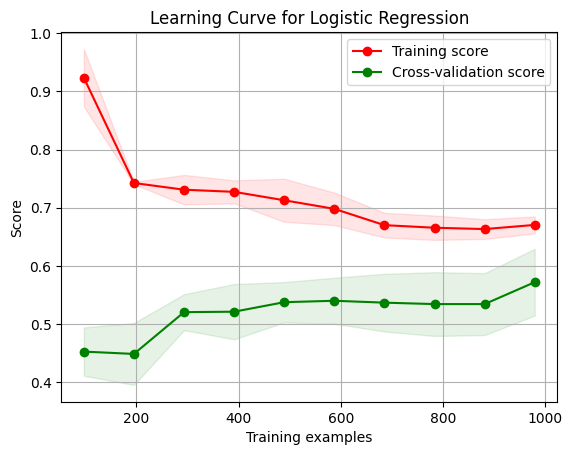

Training Random Forest...


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[[101  16   0]
 [ 13  66   1]
 [  3  18  27]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.66      0.82      0.73        80
           2       0.96      0.56      0.71        48

    accuracy                           0.79       245
   macro avg       0.83      0.75      0.77       245
weighted avg       0.82      0.79      0.79       245

Best params for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Accuracy for Random Forest: 0.7918

Cross-validation (accuracy) [0.68163265 0.74285714 0.59591837 0.67346939 0.7704918 ]


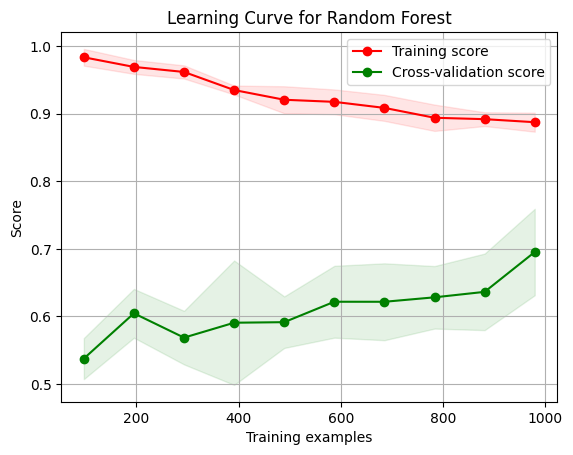

Training KNeighborsClassifier...
[[97 19  1]
 [20 52  8]
 [ 4 18 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       117
           1       0.58      0.65      0.62        80
           2       0.74      0.54      0.63        48

    accuracy                           0.71       245
   macro avg       0.71      0.67      0.69       245
weighted avg       0.72      0.71      0.71       245

Best params for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy for KNeighborsClassifier: 0.7143

Cross-validation (accuracy) [0.58367347 0.59183673 0.50612245 0.61632653 0.68442623]


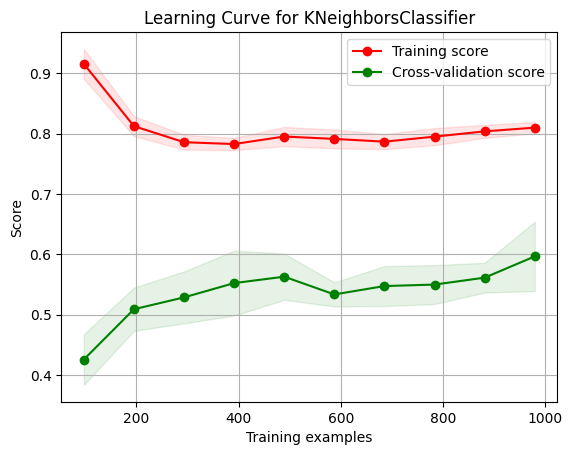

Training DecisionTreeClassifier...
[[111   5   1]
 [ 35  41   4]
 [  4  10  34]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       117
           1       0.73      0.51      0.60        80
           2       0.87      0.71      0.78        48

    accuracy                           0.76       245
   macro avg       0.78      0.72      0.74       245
weighted avg       0.76      0.76      0.75       245

Best params for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy for DecisionTreeClassifier: 0.7592

Cross-validation (accuracy) [0.67346939 0.68571429 0.6122449  0.70612245 0.7704918 ]


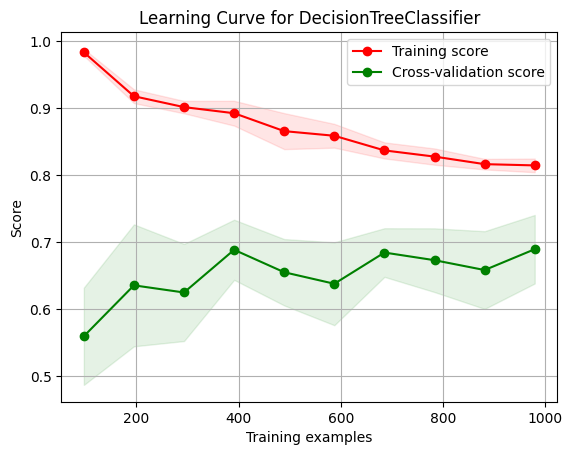

In [85]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

param_grids = {
    'Logistic Regression': {
        'max_iter':[1000,2000,10000],
        'C': [0.001,0.01,0.1],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [1,2,3,4,5,10,20],
        'max_depth': [2,3,5 ,10],
        'min_samples_split': [2, 3,4,5],
        'min_samples_leaf': [2,3,4,5]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [10,20,25,35,50],
        'weights': ['uniform'],
        'metric': ['euclidean', 'manhattan']
    },
    'DecisionTreeClassifier': {
        'max_depth': [2,5],
        'min_samples_split': [5 , 10],
        'min_samples_leaf': [2,3]
    }
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_estimators = {}
for model_name in models.keys():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    best_model = grid_search.best_estimator_
    y_pred = best_estimators[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    con = confusion_matrix(y_test, y_pred)
    rep = classification_report(y_test, y_pred)
    print(con)
    print(rep)
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Accuracy for {model_name}: {accuracy:.4f}\n")
    scores = cross_val_score(best_model, X, y, cv=5)
    print('Cross-validation (accuracy)', scores)
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X, y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure()
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

على مجموعة البيانات المعالجة

[[102  15   0]
 [ 13  64   3]
 [  2  13  33]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.70      0.80      0.74        80
           2       0.92      0.69      0.79        48

    accuracy                           0.81       245
   macro avg       0.83      0.79      0.80       245
weighted avg       0.82      0.81      0.81       245

Accuracy : 0.8122

Cross-validation (accuracy) [0.75510204 0.74693878 0.6122449  0.66938776 0.75409836]


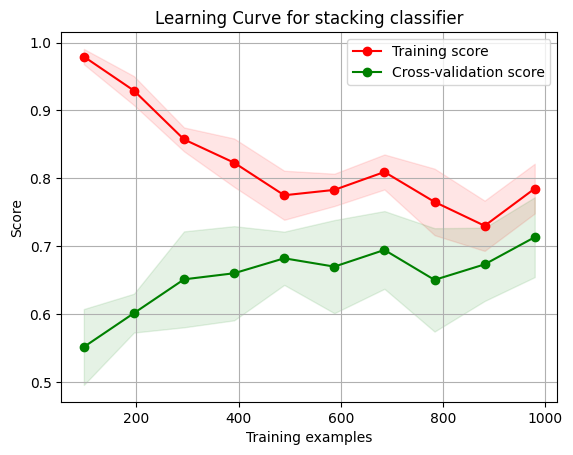

In [86]:
estimators = [
    ('logistic', LogisticRegression(C=0.1, penalty='l2', solver='liblinear')),
    ('random_forest', RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='uniform')),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10))
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20)
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
con = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)
print(con)
print(rep)
print(f"Accuracy : {accuracy:.4f}\n")
scores = cross_val_score(stacking_classifier, X, y, cv=5)
print('Cross-validation (accuracy)', scores)
train_sizes, train_scores, test_scores = learning_curve(
    stacking_classifier, X, y, cv=5,
     scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title(f"Learning Curve for stacking classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

على مجموعة البيانات الأصلية

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=42)

[[99 18  0]
 [10 66  4]
 [ 0 18 30]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       117
           1       0.65      0.82      0.73        80
           2       0.88      0.62      0.73        48

    accuracy                           0.80       245
   macro avg       0.81      0.77      0.78       245
weighted avg       0.82      0.80      0.80       245

Accuracy : 0.7959

Cross-validation (accuracy) [0.75918367 0.67346939 0.62040816 0.71836735 0.72131148]


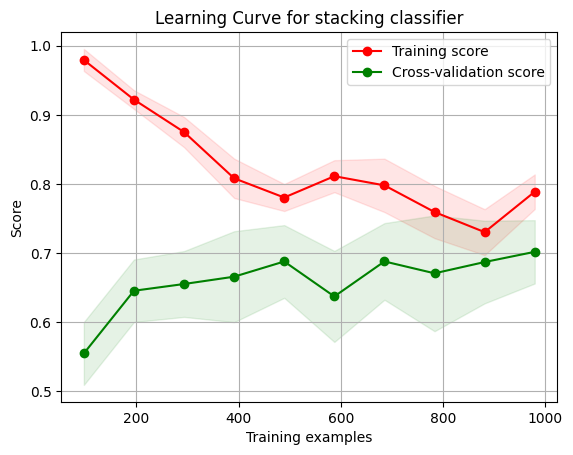

In [88]:
estimators = [
    ('logistic', LogisticRegression(C=0.1, penalty='l2', solver='liblinear')),
    ('random_forest', RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='uniform')),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10))
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20)
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
con = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)
print(con)
print(rep)
print(f"Accuracy : {accuracy:.4f}\n")
scores = cross_val_score(stacking_classifier, X, y, cv=5)
print('Cross-validation (accuracy)', scores)
train_sizes, train_scores, test_scores = learning_curve(
    stacking_classifier, X, y, cv=5,
     scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title(f"Learning Curve for stacking classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()